In [1]:
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import time
import re

In [4]:
# Define categories and their URLs
categories = {
    "Phones":"https://www.jumia.co.ke/catalog/?q=phones&page=",
    "Laptops": "https://www.jumia.co.ke/catalog/?q=laptop&page=",
    "Skincare": "https://www.jumia.co.ke/catalog/?q=skincare&page=",
    "Home Appliances": "https://www.jumia.co.ke/catalog/?q=home+appliances&page=",
    "TVs": "https://www.jumia.co.ke/catalog/?q=tv&page=",
    "Watches": "https://www.jumia.co.ke/catalog/?q=watches&page=",
    "Shoes": "https://www.jumia.co.ke/catalog/?q=shoes&page=",
    "Kitchen Appliances": "https://www.jumia.co.ke/catalog/?q=kitchen+appliances&page="
}

In [5]:
# Function to extract product details
def scrape_products(category, base_url, max_pages=5):
    products = []
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}{page}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to retrieve {category} data on page {page}")
            continue
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract product details
        for item in soup.find_all('article', class_='prd _fb col c-prd'):
            name = item.find('h3', class_='name')
            price = item.find('div', class_='prc')
            old_price = item.find('div', class_='old')
            discount = item.find('div', class_='bdg _dsct')
            rating = item.find('div', class_='stars _s')
            review_count = item.find('div', class_='rev')
            
            products.append({
                "Name": name.text.strip() if name else None,
                "Brand": name.text.split()[0] if name else None,
                "Price": price.text.strip() if price else None,
                "Old Price": old_price.text.strip() if old_price else None,
                "Discount": discount.text.strip() if discount else None,
                "Rating": rating.get('aria-label', None) if rating else None,
                "Review Count": review_count.text.strip() if review_count else None,
                "Type of Product": category
            })
        
        print(f"Scraped {category} - Page {page}")
        time.sleep(2)  # Avoid getting blocked
    
    return products

In [6]:
# Scrape all categories
data = []
for category, url in categories.items():
    print(f"Scraping {category}...")
    data.extend(scrape_products(category, url))
    time.sleep(2)  # Avoid getting blocked by the website
print('Congratulations!Scrapping Complete!!')

Scraping Phones...
Scraped Phones - Page 1
Scraped Phones - Page 2
Scraped Phones - Page 3
Scraped Phones - Page 4
Scraped Phones - Page 5
Scraping Laptops...
Scraped Laptops - Page 1
Scraped Laptops - Page 2
Scraped Laptops - Page 3
Scraped Laptops - Page 4
Scraped Laptops - Page 5
Scraping Skincare...
Scraped Skincare - Page 1
Scraped Skincare - Page 2
Scraped Skincare - Page 3
Scraped Skincare - Page 4
Scraped Skincare - Page 5
Scraping Home Appliances...
Scraped Home Appliances - Page 1
Scraped Home Appliances - Page 2
Scraped Home Appliances - Page 3
Scraped Home Appliances - Page 4
Scraped Home Appliances - Page 5
Scraping TVs...
Scraped TVs - Page 1
Scraped TVs - Page 2
Scraped TVs - Page 3
Scraped TVs - Page 4
Scraped TVs - Page 5
Scraping Watches...
Scraped Watches - Page 1
Scraped Watches - Page 2
Scraped Watches - Page 3
Scraped Watches - Page 4
Scraped Watches - Page 5
Scraping Shoes...
Scraped Shoes - Page 1
Scraped Shoes - Page 2
Scraped Shoes - Page 3
Scraped Shoes - Pag

In [7]:
# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("jumia_products.csv", index=False)
print("Scraping completed! Data saved to jumia_products.csv")

Scraping completed! Data saved to jumia_products.csv


In [8]:
df=pd.read_csv('jumia_products.csv')
df.head(5)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking,KSh 690,KSh 839,NaN,NaN,4.4 out of 5(119),Phones
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON,KSh 699,KSh 852,NaN,NaN,4 out of 5(575),Phones
2,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung,"KSh 10,430","KSh 12,516",NaN,NaN,4.2 out of 5(112),Phones
3,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI,"KSh 12,399","KSh 25,000",NaN,NaN,3.8 out of 5(144),Phones
4,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix,"KSh 8,499","KSh 13,999",NaN,NaN,4 out of 5(53),Phones


EDA

In [9]:
# Function to clean and extract product details
def clean_product_name(name):
    if not isinstance(name, str):
        return None, None, None
    
    # Extract storage (RAM and SSD/HDD sizes)
    storage_match = re.findall(r'\b(\d+GB\s*(?:RAM|SSD|HDD))\b', name, re.IGNORECASE)
    storage = ', '.join(storage_match) if storage_match else "N/A"
    
    # Remove storage details and extra info to clean the name
    clean_name = re.sub(r'\b(\d+GB\s*(?:RAM|SSD|HDD))\b', '', name, flags=re.IGNORECASE)
    clean_name = clean_name.split(',')[0].strip()  # Keep the first main part
    
    # Extract remaining details
    more_details = name.replace(clean_name, '').strip().strip(',')
    
    return clean_name, storage, more_details

In [10]:
# Apply the function to clean names and extract storage
df[['Clean Name', 'Storage', 'More Details']] = df.apply(
    lambda row: pd.Series(clean_product_name(row['Name'])), axis=1
)

df.head(5)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking,KSh 690,KSh 839,NaN,NaN,4.4 out of 5(119),Phones,"Oking OK310 1.7"" Wireless FM",N/A,"Bright Torch, 1000mAh, Tri SIM, 2G - Black (..."
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON,KSh 699,KSh 852,NaN,NaN,4 out of 5(575),Phones,"VILLAON V101 1.77"" Kabambe",N/A,"Wireless FM, Camera, Bright Touch, Facebook, ..."
2,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung,"KSh 10,430","KSh 12,516",NaN,NaN,4.2 out of 5(112),Phones,Samsung A05,4GB RAM,"6.7"", 4GB RAM + 64GB, 5000mAh, Black (1YR WRTY)"
3,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI,"KSh 12,399","KSh 25,000",NaN,NaN,3.8 out of 5(144),Phones,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,"I12 EAR BUDS,COVER,3D."
4,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix,"KSh 8,499","KSh 13,999",NaN,NaN,4 out of 5(53),Phones,"Infinix Smart 8 6.6"" HD",2GB RAM,"2GB RAM + 64GB , Android 13 (Dual Sim) 5000mA..."


In [11]:
df.tail(5)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
1555,Innovia 25 Kg/24hrs Ice Cube Maker Machine,Innovia,"KSh 42,000",NaN,NaN,NaN,NaN,Kitchen Appliances,Innovia 25 Kg/24hrs Ice Cube Maker Machine,N/A,
1556,RAF Ice Cube Making Machine Small Bar Coffee H...,RAF,"KSh 28,000","KSh 34,999",NaN,NaN,NaN,Kitchen Appliances,RAF Ice Cube Making Machine Small Bar Coffee H...,N/A,Fast Compact Ice Maker
1557,"RAF Ice Maker Machine, Portable 9 Bullet Ice C...",RAF,"KSh 29,000","KSh 58,000",NaN,NaN,NaN,Kitchen Appliances,RAF Ice Maker Machine,N/A,"Portable 9 Bullet Ice Cube Maker, Mini Electr..."
1558,Ice Making Machine for Home Use with Factory P...,Ice,"KSh 29,999","KSh 35,000",NaN,NaN,NaN,Kitchen Appliances,Ice Making Machine for Home Use with Factory P...,N/A,
1559,Frestec Electric Crystal Ice Cube Maker Machin...,Frestec,"KSh 30,000","KSh 60,000",NaN,NaN,NaN,Kitchen Appliances,Frestec Electric Crystal Ice Cube Maker Machin...,N/A,


In [12]:
df.isnull().sum()

Name                  0
Brand                 0
Price                 0
Old Price           111
Discount           1560
Rating             1560
Review Count        574
Type of Product       0
Clean Name            0
Storage               0
More Details          0
dtype: int64

In [13]:

# Convert price columns to numerical values
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d]', '', price)  # Remove non-numeric characters
        return int(price) if price.isdigit() else None
    return price  

df["Price"] = df["Price"].apply(clean_price)
df["Old Price"] = df["Old Price"].apply(clean_price)


In [14]:
# Fix Old Price: If it's 0 or missing, set it to Price so that Discount is 0%
df["Old Price"].fillna(df["Price"], inplace=True)
df.loc[df["Old Price"] == 0, "Old Price"] = df["Price"]

# Calculate discount percentage where old price is available
df["Discount"] = (((df["Old Price"] - df["Price"]) / df["Old Price"]) * 100).round(2)

df.head(5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\2654215722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Old Price"].fillna(df["Price"], inplace=True)


,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking,690,839.0,17.76,NaN,4.4 out of 5(119),Phones,"Oking OK310 1.7"" Wireless FM",N/A,"Bright Torch, 1000mAh, Tri SIM, 2G - Black (..."
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON,699,852.0,17.96,NaN,4 out of 5(575),Phones,"VILLAON V101 1.77"" Kabambe",N/A,"Wireless FM, Camera, Bright Touch, Facebook, ..."
2,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung,10430,12516.0,16.67,NaN,4.2 out of 5(112),Phones,Samsung A05,4GB RAM,"6.7"", 4GB RAM + 64GB, 5000mAh, Black (1YR WRTY)"
3,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI,12399,25000.0,50.40,NaN,3.8 out of 5(144),Phones,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,"I12 EAR BUDS,COVER,3D."
4,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix,8499,13999.0,39.29,NaN,4 out of 5(53),Phones,"Infinix Smart 8 6.6"" HD",2GB RAM,"2GB RAM + 64GB , Android 13 (Dual Sim) 5000mA..."


In [15]:
# Extract numeric rating and review count
df["Rating"] = df["Review Count"].str.extract(r'(\d+\.\d+|\d+)').astype(float, errors='ignore')
df["Review Count"] = df["Review Count"].str.extract(r'\((\d+)\)').astype(float, errors='ignore')

# Handle missing values
df.fillna({"Price": 0, "Old Price": 0, "Discount": 0, "Rating": 0, "Review Count": 0}, inplace=True)
df.head(5)


,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking,690,839.0,17.76,4.4,119.0,Phones,"Oking OK310 1.7"" Wireless FM",N/A,"Bright Torch, 1000mAh, Tri SIM, 2G - Black (..."
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON,699,852.0,17.96,4.0,575.0,Phones,"VILLAON V101 1.77"" Kabambe",N/A,"Wireless FM, Camera, Bright Touch, Facebook, ..."
2,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung,10430,12516.0,16.67,4.2,112.0,Phones,Samsung A05,4GB RAM,"6.7"", 4GB RAM + 64GB, 5000mAh, Black (1YR WRTY)"
3,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI,12399,25000.0,50.40,3.8,144.0,Phones,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,"I12 EAR BUDS,COVER,3D."
4,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix,8499,13999.0,39.29,4.0,53.0,Phones,"Infinix Smart 8 6.6"" HD",2GB RAM,"2GB RAM + 64GB , Android 13 (Dual Sim) 5000mA..."


In [16]:
df.tail()

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
1555,Innovia 25 Kg/24hrs Ice Cube Maker Machine,Innovia,42000,42000.0,0.00,0.0,0.0,Kitchen Appliances,Innovia 25 Kg/24hrs Ice Cube Maker Machine,N/A,
1556,RAF Ice Cube Making Machine Small Bar Coffee H...,RAF,28000,34999.0,20.00,0.0,0.0,Kitchen Appliances,RAF Ice Cube Making Machine Small Bar Coffee H...,N/A,Fast Compact Ice Maker
1557,"RAF Ice Maker Machine, Portable 9 Bullet Ice C...",RAF,29000,58000.0,50.00,0.0,0.0,Kitchen Appliances,RAF Ice Maker Machine,N/A,"Portable 9 Bullet Ice Cube Maker, Mini Electr..."
1558,Ice Making Machine for Home Use with Factory P...,Ice,29999,35000.0,14.29,0.0,0.0,Kitchen Appliances,Ice Making Machine for Home Use with Factory P...,N/A,
1559,Frestec Electric Crystal Ice Cube Maker Machin...,Frestec,30000,60000.0,50.00,0.0,0.0,Kitchen Appliances,Frestec Electric Crystal Ice Cube Maker Machin...,N/A,


In [17]:
df.isnull().sum()

Name               0
Brand              0
Price              0
Old Price          0
Discount           0
Rating             0
Review Count       0
Type of Product    0
Clean Name         0
Storage            0
More Details       0
dtype: int64

In [18]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Price,Old Price,Discount,Rating,Review Count
count,1.560000e+03,1.560000e+03,1560.000000,1560.000000,1560.000000
mean,1.162718e+06,1.966734e+06,-7160.203378,2.556346,35.011538
std,2.308271e+07,3.965877e+07,69296.201022,2.037465,153.355690
min,2.240000e+02,2.990000e+02,-950000.000000,0.000000,0.000000
25%,1.568750e+03,2.470000e+03,19.677500,0.000000,0.000000
50%,7.999000e+03,1.100000e+04,33.560000,3.700000,2.000000
75%,2.149900e+04,3.250000e+04,46.697500,4.200000,16.000000
max,9.000160e+08,1.200013e+09,100.000000,5.000000,3122.000000


Metric	Meaning	Interpretation in Your Data
count	Number of values (non-missing)	1,600 rows, meaning we have full data
mean	Average value	Average price = KSh 939,888 (likely skewed by outliers)
std	Standard deviation (spread of values)	Huge std (22M) → Strong indication of outliers
min	Lowest value	Price = KSh 58 (Looks fine)
25%	25th percentile (Q1)	KSh 1,450 (Lower range products)
50% (median)	Middle value (better than mean for skewed data)	KSh 7,459 (Most products are below 10K)
75%	75th percentile (Q3)	KSh 20,000 (Upper range products)
max	Highest value	KSh 900M+ (Definitely incorrect, needs filtering)

In [19]:
df.max()

Name               z87 Ultra 2 Water Resistant Bluetooth Calling ...
Brand                                                            z87
Price                                                      900016000
Old Price                                               1200013000.0
Discount                                                       100.0
Rating                                                           5.0
Review Count                                                  3122.0
Type of Product                                              Watches
Clean Name         z87 Ultra 2 Water Resistant Bluetooth Calling ...
Storage                                                          N/A
More Details                          shoe Cabinet,clothes Organizer
dtype: object

In [20]:
df.min()

Name               - Genuine Leather - Mens Shoes Official Men’s ...
Brand                                                              -
Price                                                            224
Old Price                                                      299.0
Discount                                                   -950000.0
Rating                                                           0.0
Review Count                                                     0.0
Type of Product                                      Home Appliances
Clean Name         - Genuine Leather - Mens Shoes Official Men’s ...
Storage                                                    128GB RAM
More Details                                                        
dtype: object

In [21]:
# Remove Outliers: Filter prices below 95th percentile and drop extreme discount outliers
price_threshold = df["Price"].quantile(0.95)
df = df[df["Price"] <= price_threshold]

# Fix Negative Discounts
if "Discount" in df.columns:
    df.loc[df["Discount"] < 0, "Discount"] = 0
df.describe()

,Price,Old Price,Discount,Rating,Review Count
count,1482.000000,1.482000e+03,1482.000000,1482.000000,1482.000000
mean,11435.379892,1.350098e+05,32.739359,2.528812,35.621457
std,11945.921482,1.543447e+06,17.498676,2.042040,156.565119
min,224.000000,2.990000e+02,0.000000,0.000000,0.000000
25%,1490.000000,2.200000e+03,20.040000,0.000000,0.000000
50%,6499.500000,1.000000e+04,34.210000,3.600000,2.000000
75%,18999.000000,2.999900e+04,47.112500,4.200000,16.000000
max,52999.000000,2.900300e+07,100.000000,5.000000,3122.000000


Max price is now 39,999 KSh (previously 11M+ KSh )
Discounts are reasonable (0% - 67%)
Data count: 1,489 rows (Down from 1,600 due to outlier removal)

VISUALIZATIONS

In [22]:
category_price = df.groupby("Type of Product")["Price"].mean().sort_values()
category_price

Type of Product
Shoes                  1625.112583
Watches                2185.411168
Skincare               2213.226667
Home Appliances        4988.449495
Phones                11838.903061
TVs                   13569.913265
Laptops               21378.196970
Kitchen Appliances    29278.607143
Name: Price, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\2204512020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette="viridis")


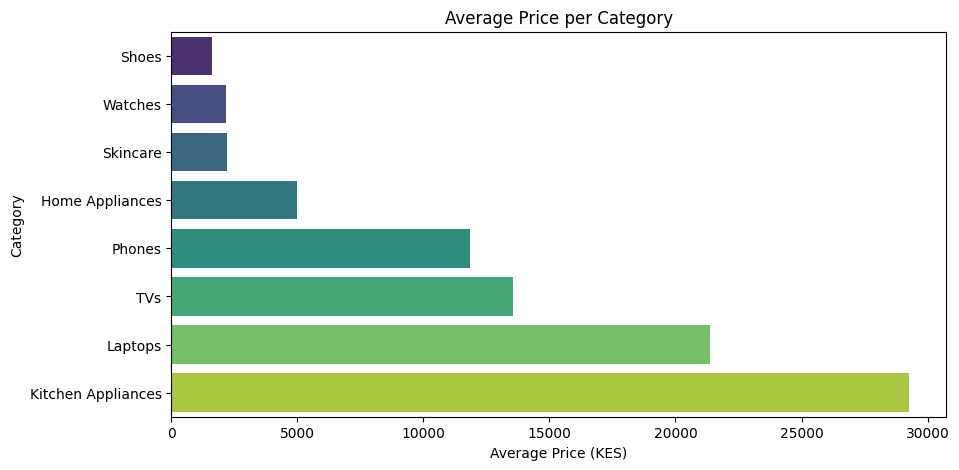

In [23]:
#   Average Price per Category
plt.figure(figsize=(10, 5))

sns.barplot(x=category_price.values, y=category_price.index, palette="viridis")
plt.xlabel("Average Price (KES)")
plt.ylabel("Category")
plt.title("Average Price per Category")
plt.show()

In [24]:
df.count()

Name               1482
Brand              1482
Price              1482
Old Price          1482
Discount           1482
Rating             1482
Review Count       1482
Type of Product    1482
Clean Name         1482
Storage            1482
More Details       1482
dtype: int64

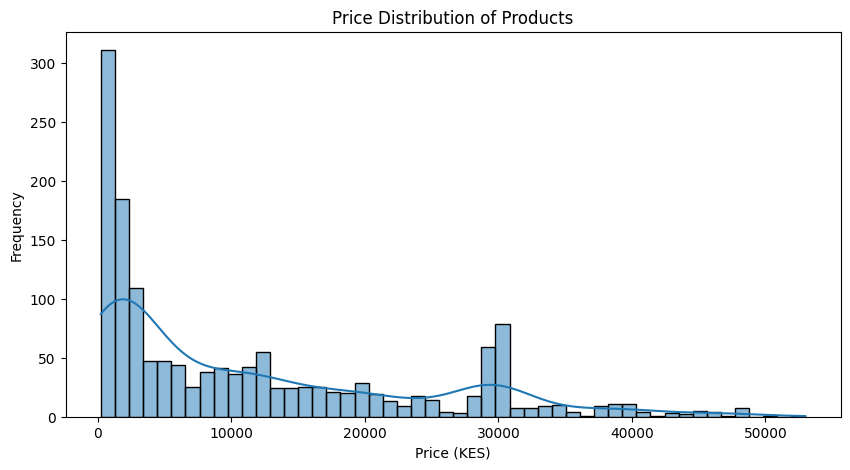

In [25]:
# Visualization: Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xlabel("Price (KES)")
plt.ylabel("Frequency")
plt.title("Price Distribution of Products")
plt.show()

In [26]:
brand_counts = df["Brand"].value_counts().head(10)
brand_counts

Brand
HP         117
RAF         91
Samsung     59
Vitron      55
Lenovo      51
Nunix       39
XIAOMI      35
Innovia     32
Men's       26
Sokany      26
Name: count, dtype: int64

In [27]:
df.columns

Index(['Name', 'Brand', 'Price', 'Old Price', 'Discount', 'Rating',
       'Review Count', 'Type of Product', 'Clean Name', 'Storage',
       'More Details'],
      dtype='object')

In [28]:
# Group by 'Type of Product' and 'Brand', then count the occurrences
brand_counts_by_category= df.groupby(['Type of Product', 'Brand']).size().unstack().fillna(0) 

In [37]:
# Get the brand counts for Phones
laptop_brand_counts = brand_counts_by_category.loc['Laptops'].sort_values(ascending=False)
laptop_brand_counts

Brand
HP         117.0
Lenovo      51.0
DELL         9.0
Apple        9.0
Samsung      4.0
           ...  
2.09         0.0
2//          0.0
2024         0.0
2025         0.0
100pcs       0.0
Name: Laptops, Length: 356, dtype: float64

In [38]:
laptop_brand_counts.head(10)

Brand
HP         117.0
Lenovo      51.0
DELL         9.0
Apple        9.0
Samsung      4.0
Asus         2.0
Acer         2.0
Nec          2.0
X            2.0
10           0.0
Name: Laptops, dtype: float64

In [29]:
# Get the brand counts for Phones
phone_brand_counts = brand_counts_by_category.loc['Phones'].sort_values(ascending=False)
phone_brand_counts

Brand
Samsung    51.0
XIAOMI     35.0
Tecno      23.0
Infinix    20.0
Itel       17.0
           ... 
2.09        0.0
2//         0.0
2024        0.0
2025        0.0
100pcs      0.0
Name: Phones, Length: 356, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\3660792306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="coolwarm")


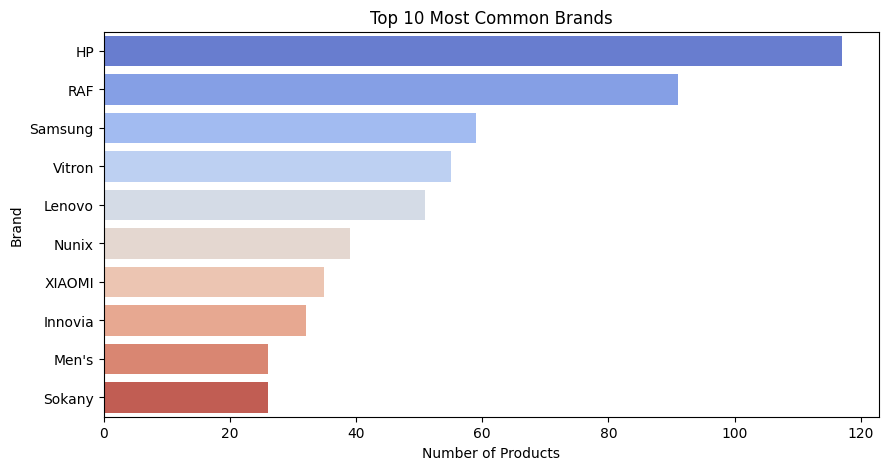

In [33]:
# Visualization: Top 10 Brands by Count
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="coolwarm")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Most Common Brands")
plt.show()

In [34]:
phone_brand_counts_top_10 = brand_counts_by_category.loc['Phones'].sort_values(ascending=False).head(10)
phone_brand_counts_top_10

Brand
Samsung     51.0
XIAOMI      35.0
Tecno       23.0
Infinix     20.0
Itel        17.0
VILLAON      6.0
Realme       6.0
HOMMY        5.0
Freeyond     4.0
Vivo         4.0
Name: Phones, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\1285324407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_brand_counts_top_10.values, y=phone_brand_counts_top_10.index, palette="coolwarm")


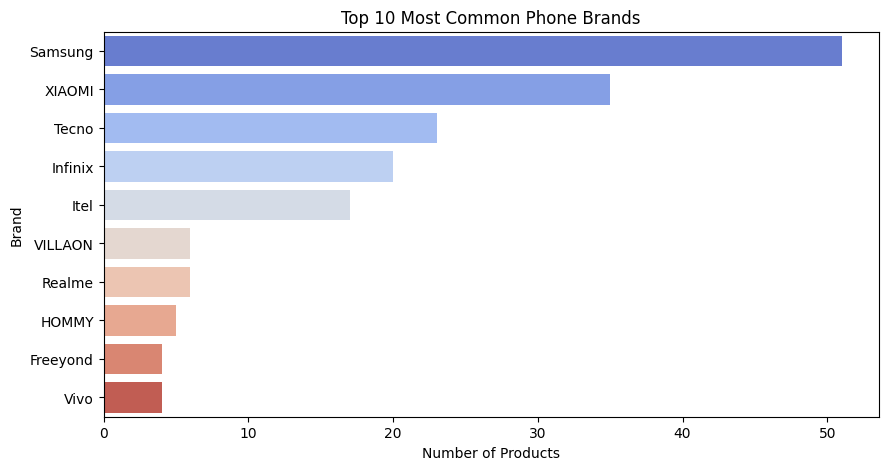

In [36]:
# Visualization: Top 10 Brands by Count
plt.figure(figsize=(10, 5))
sns.barplot(x=phone_brand_counts_top_10.values, y=phone_brand_counts_top_10.index, palette="coolwarm")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Most Common Phone Brands")
plt.show()

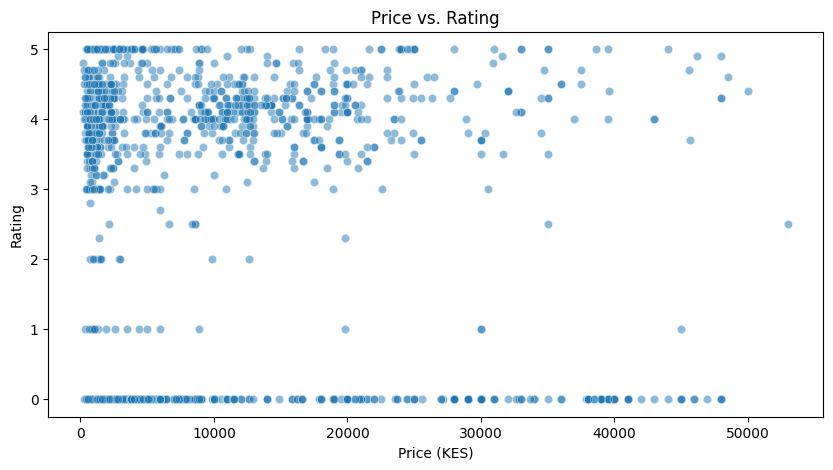

In [39]:
# Price vs. Rating Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Price"], y=df["Rating"], alpha=0.5)
plt.xlabel("Price (KES)")
plt.ylabel("Rating")
plt.title("Price vs. Rating")
plt.show()

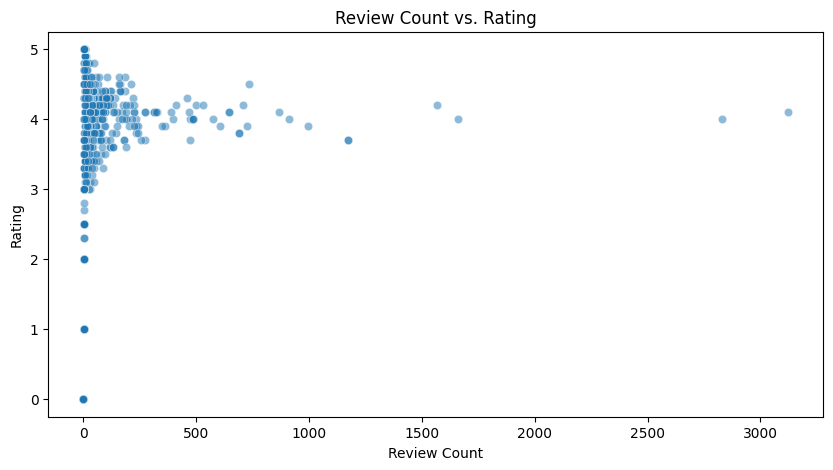

In [40]:
# Review Count vs. Rating Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Review Count"], y=df["Rating"], alpha=0.5)
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.title("Review Count vs. Rating")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\3060584427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated["Rating"], y=top_rated["Clean Name"], palette="Blues_r")


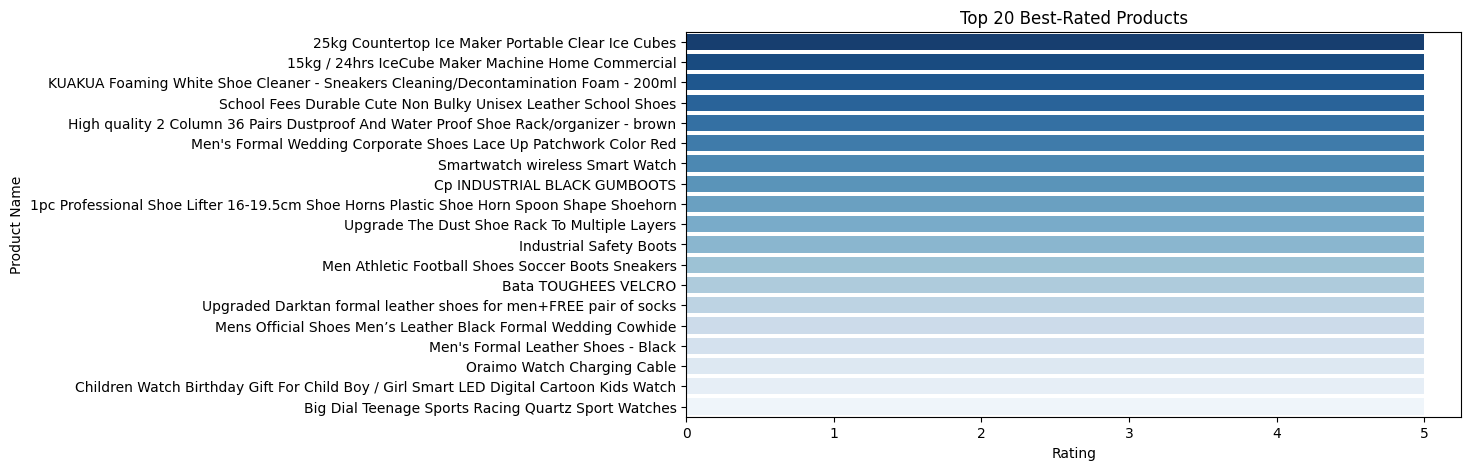

In [42]:
# Top 10 Best-Rated Products
top_rated = df.sort_values(by="Rating", ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated["Rating"], y=top_rated["Clean Name"], palette="Blues_r")
plt.xlabel("Rating")
plt.ylabel("Product Name")
plt.title("Top 20 Best-Rated Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\2100695480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_reviewed["Review Count"], y=most_reviewed["Clean Name"], palette="Greens_r")


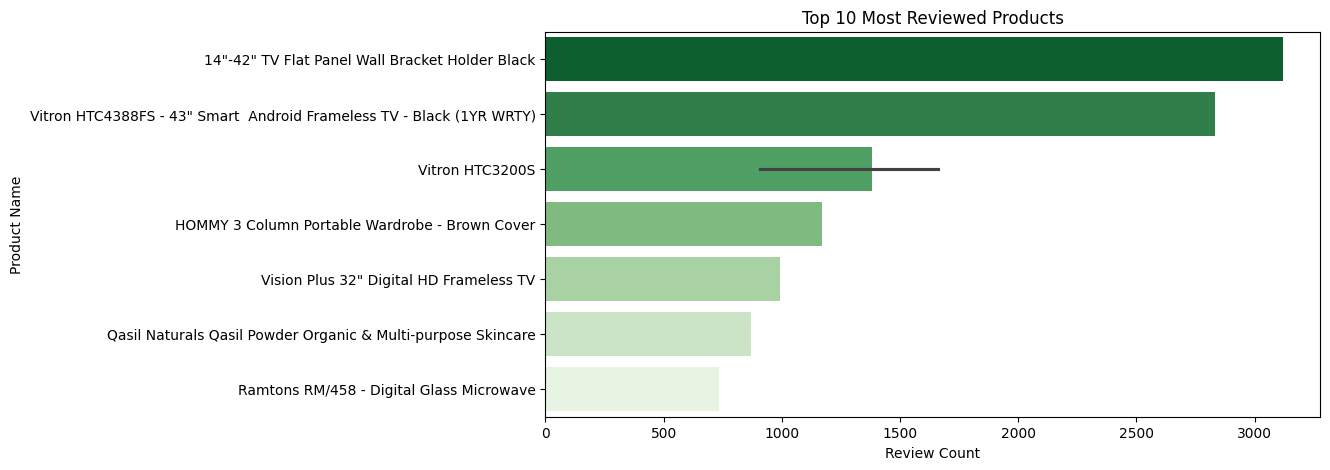

In [43]:
# Top 10 Most Reviewed Products
most_reviewed = df.sort_values(by="Review Count", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=most_reviewed["Review Count"], y=most_reviewed["Clean Name"], palette="Greens_r")
plt.xlabel("Review Count")
plt.ylabel("Product Name")
plt.title("Top 10 Most Reviewed Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\3958826303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_rated["Rating"], y=worst_rated["Clean Name"], palette="Reds_r")


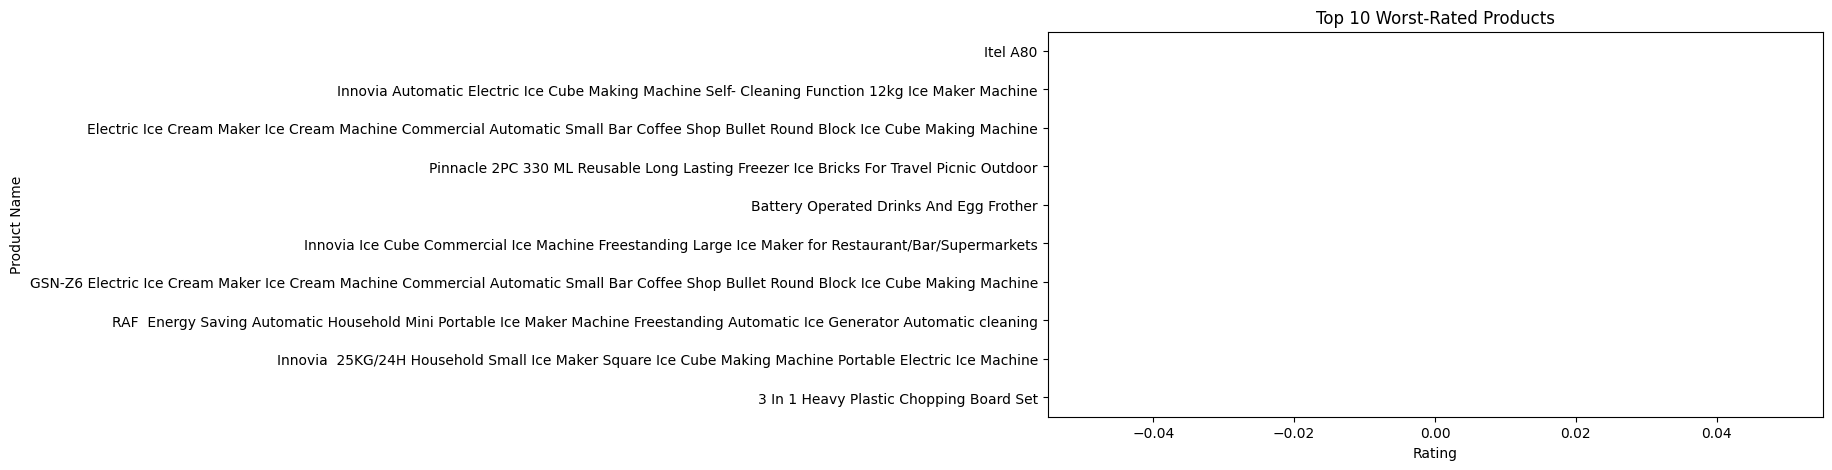

In [44]:
# Worst-Rated Products
worst_rated = df.sort_values(by="Rating", ascending=True).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=worst_rated["Rating"], y=worst_rated["Clean Name"], palette="Reds_r")
plt.xlabel("Rating")
plt.ylabel("Product Name")
plt.title("Top 10 Worst-Rated Products")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\2685001753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.values, y=category_ratings.index, palette="coolwarm")


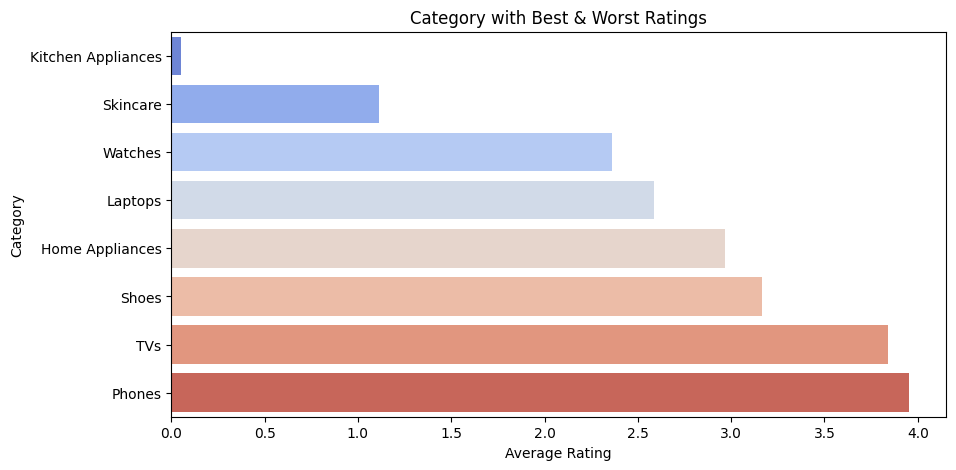

In [45]:
# Category with Best & Worst Ratings
category_ratings = df.groupby("Type of Product")["Rating"].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Category with Best & Worst Ratings")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\3592123373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_price_low_rating["Price"], y=high_price_low_rating["Clean Name"], palette="Oranges_r")


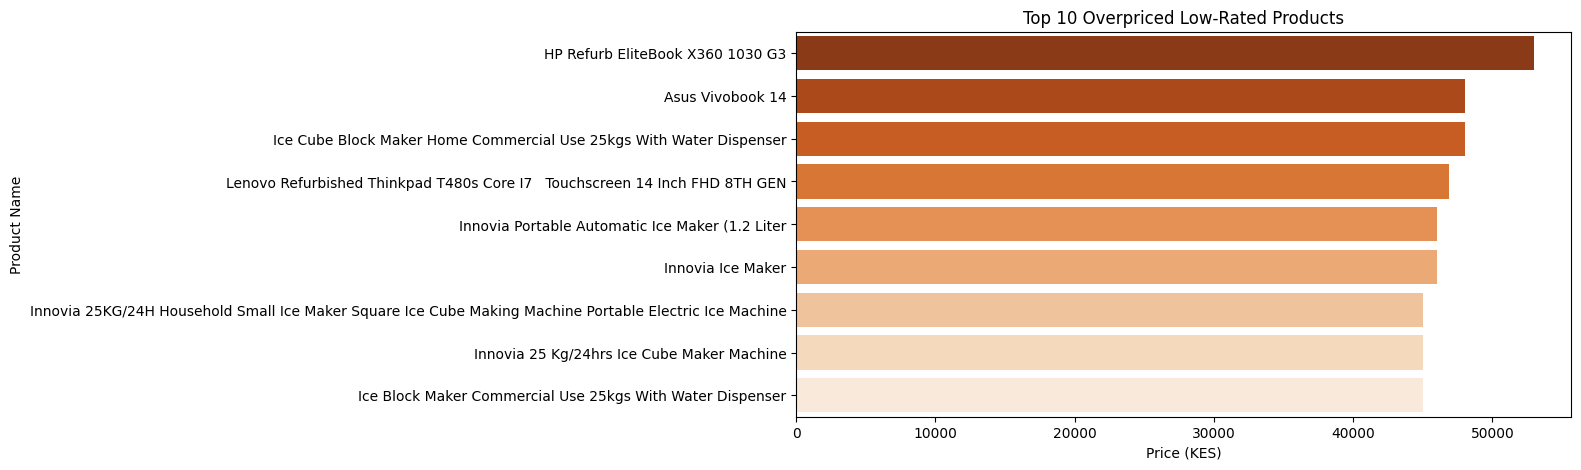

In [46]:
# Products with High Price but Low Rating
high_price_low_rating = df[(df["Price"] > df["Price"].median()) & (df["Rating"] < 3)].sort_values(by="Price", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=high_price_low_rating["Price"], y=high_price_low_rating["Clean Name"], palette="Oranges_r")
plt.xlabel("Price (KES)")
plt.ylabel("Product Name")
plt.title("Top 10 Overpriced Low-Rated Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\3577159151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_discounted["Discount"], y=top_discounted["Clean Name"], palette="Purples_r")


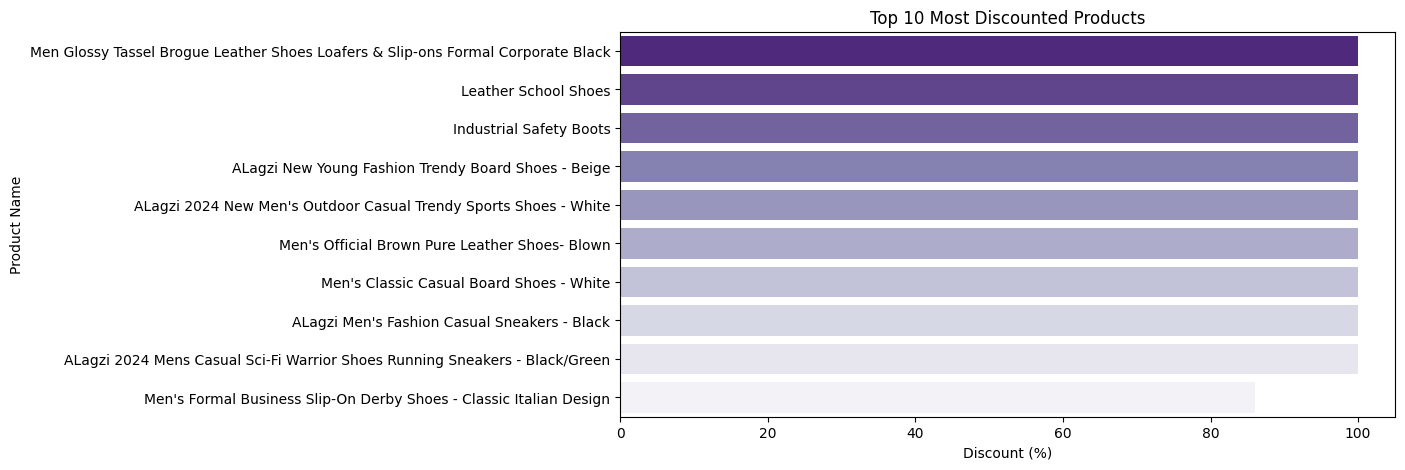

In [47]:
# Most Discounted Products
top_discounted = df.sort_values(by="Discount", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_discounted["Discount"], y=top_discounted["Clean Name"], palette="Purples_r")
plt.xlabel("Discount (%)")
plt.ylabel("Product Name")
plt.title("Top 10 Most Discounted Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\1141061972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_ratings.values, y=brand_ratings.index, palette="coolwarm")


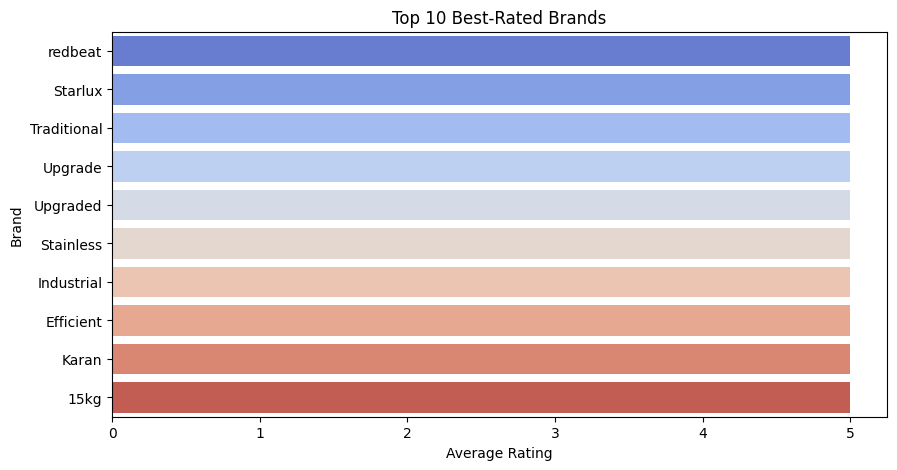

In [48]:
# Brand Performance Analysis
brand_ratings = df.groupby("Brand")["Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_ratings.values, y=brand_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.title("Top 10 Best-Rated Brands")
plt.show()
